In [273]:
from bs4 import BeautifulSoup
import requests

In [274]:
url="https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"
page = requests.get(url)
soup=BeautifulSoup(page.text,'html')

In [275]:
soup

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-featu

In [276]:
#<table class="wikitable sortable jquery-tablesorter"> 

In [277]:
soup.find('table', class_='wikitable sortable')

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [278]:
table=soup.find_all("table")[0]

In [279]:
print(table)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">648,125
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [280]:
world_titles=table.find_all("th")

In [281]:
world_titles

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [282]:
world_table_titles=[title.text.strip() for title in world_titles]

In [283]:
world_table_titles

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [284]:
import pandas as pd

In [285]:
df=pd.DataFrame(columns=world_table_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [286]:
column_data=table.find_all("tr")

In [287]:
for row in column_data[1:]:
    row_data=row.find_all('td')
    single_row_data=[data.text.strip() for data in row_data]

    length=len(df)
    df.loc[length]=single_row_data
    

In [288]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"
...,...,...,...,...,...,...,...
95,96,TIAA,Financials,"45,735",11.8%,"16,023","New York City, New York"
96,97,CHS,Agriculture cooperative,"45,590",-4.6%,"10,609","Inver Grove Heights, Minnesota"
97,98,Bristol-Myers Squibb,Pharmaceutical industry,"45,006",-2.5%,"34,100","New York City, New York"
98,99,Dow Chemical Company,Chemical industry,"44,622",-21.6%,"35,900","Midland, Michigan"


In [289]:
df.to_csv("top_companies_US.csv",index=False)

# Data Analysis

In [290]:
df.info()  # Data types and non-null values

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


In [291]:
df.describe()  # Summary statistics (numeric columns)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
count,100,100,100,100,100,100,100
unique,100,100,37,98,96,98,71
top,1,Walmart,Financials,"54,317",-3.6%,"45,000","New York City, New York"
freq,1,1,13,2,2,2,13


In [292]:
df.head()  # Display first few rows

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"648,125",6.0%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"574,785",11.9%,"1,525,000","Seattle, Washington"
2,3,Apple,Electronics industry,"383,482",-2.8%,"161,000","Cupertino, California"
3,4,UnitedHealth Group,Healthcare,"371,622",14.6%,"440,000","Minnetonka, Minnesota"
4,5,Berkshire Hathaway,Conglomerate,"364,482",20.7%,"396,500","Omaha, Nebraska"


### Top Industries by Revenue

In [293]:
industry_revenue = df.groupby('Industry')['Revenue (USD millions)'].sum().sort_values(ascending=False)
industry_revenue

Industry
Automotive and energy                                                             96,773
Food industry                                                                     93,935
Beverage                                                                    91,47145,754
Transportation                                                              90,95890,155
Media                                                                             88,898
Consumer products manufacturing                                                   82,006
Aerospace and defense                                                       77,79467,571
Food service                                                                      76,325
Financial                                                                   67,36454,609
Machinery                                                                         67,060
Retail                                 648,125242,290152,669150,039107,41286,37777,65...
Insurance   

### Revenue Growth Analysis

In [294]:
df1=df

In [295]:
df1['Revenue growth'] = df1['Revenue growth'].str.rstrip('%').astype(float)  # Remove % and convert to float
top_growth = df1.sort_values(by='Revenue growth', ascending=False)
top_growth[['Name', 'Industry', 'Revenue growth']]

,Name,Industry,Revenue growth
64,Nvidia,Technology,125.9
34,Goldman Sachs,Financials,57.8
20,Citigroup,Financials,55.1
11,JPMorgan Chase,Financial services,54.7
17,Bank of America,Financials,49.4
...,...,...,...
28,Valero Energy,Petroleum industry,-18.8
92,World Kinect Corporation,Energy trading,-19.2
98,Dow Chemical Company,Chemical industry,-21.6
67,ConocoPhillips,Petroleum industry,-28.7


### Companies with Most Employees

In [296]:
top_employers = df.sort_values(by='Employees', ascending=False)[['Name', 'Employees']]
top_employers

,Name,Employees
28,Valero Energy,"9,987"
67,ConocoPhillips,"9,900"
68,Pfizer,"88,000"
99,Best Buy,"85,000"
73,Cisco,"84,900"
...,...,...
82,United Airlines,"103,300"
69,Delta Air Lines,"103,000"
75,Charter Communications,"101,100"
96,CHS,"10,609"


### Headquarters Distribution

In [297]:
hq_counts = df['Headquarters'].value_counts()
hq_counts

Headquarters
New York City, New York    13
Houston, Texas              6
Atlanta, Georgia            4
Austin, Texas               2
Dallas, Texas               2
                           ..
Minneapolis, Minnesota      1
Louisville, Kentucky        1
Bloomington, Illinois       1
Seattle, Washington         1
Richfield, Minnesota        1
Name: count, Length: 71, dtype: int64

# Data Visualization

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### Bar Chart: Revenue by Company (Top 20)

In [299]:
df2=df

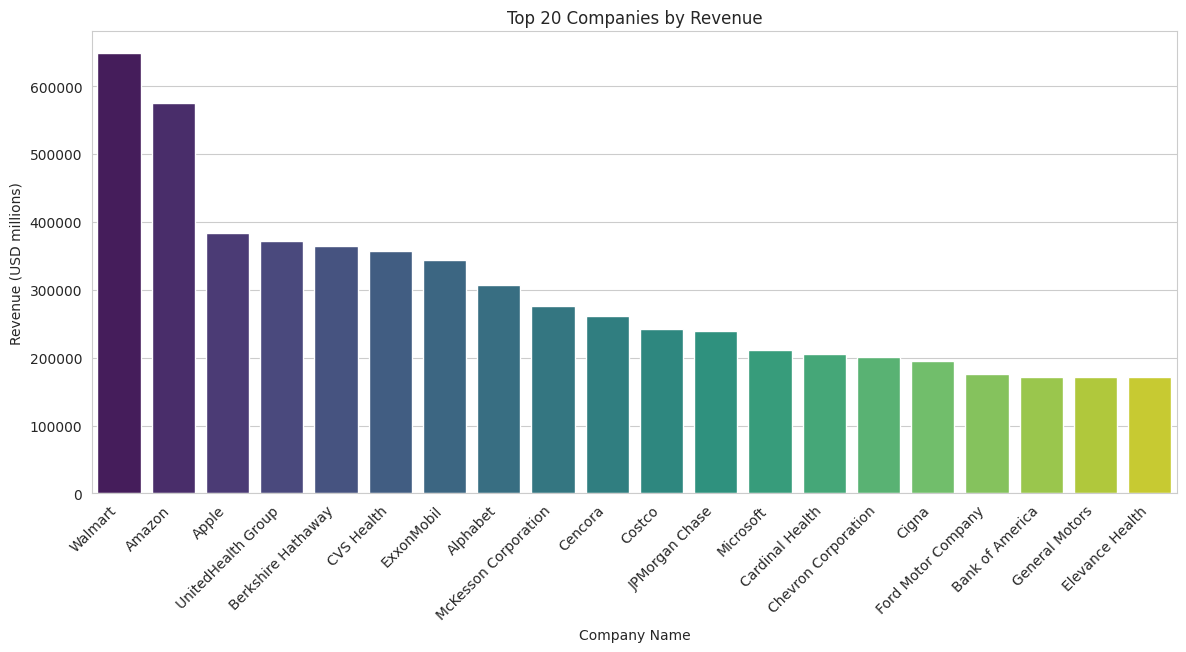

In [300]:
# Ensure revenue column is clean and numeric
df2['Revenue (USD millions)'] = df2['Revenue (USD millions)'].astype(str).str.replace(',', '').astype(float)

# Drop NaN values (if any) after conversion
df2 = df2.dropna(subset=['Revenue (USD millions)'])

# Sort and select the top 20 companies by revenue
top_20 = df2.sort_values(by='Revenue (USD millions)', ascending=False).head(20)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x=top_20['Name'], y=top_20['Revenue (USD millions)'], palette='viridis')

# Labels and Title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.ylabel('Revenue (USD millions)')
plt.xlabel('Company Name')
plt.title('Top 20 Companies by Revenue')

plt.show()

### Industry Distribution Pie Chart (Top 10 Industries)

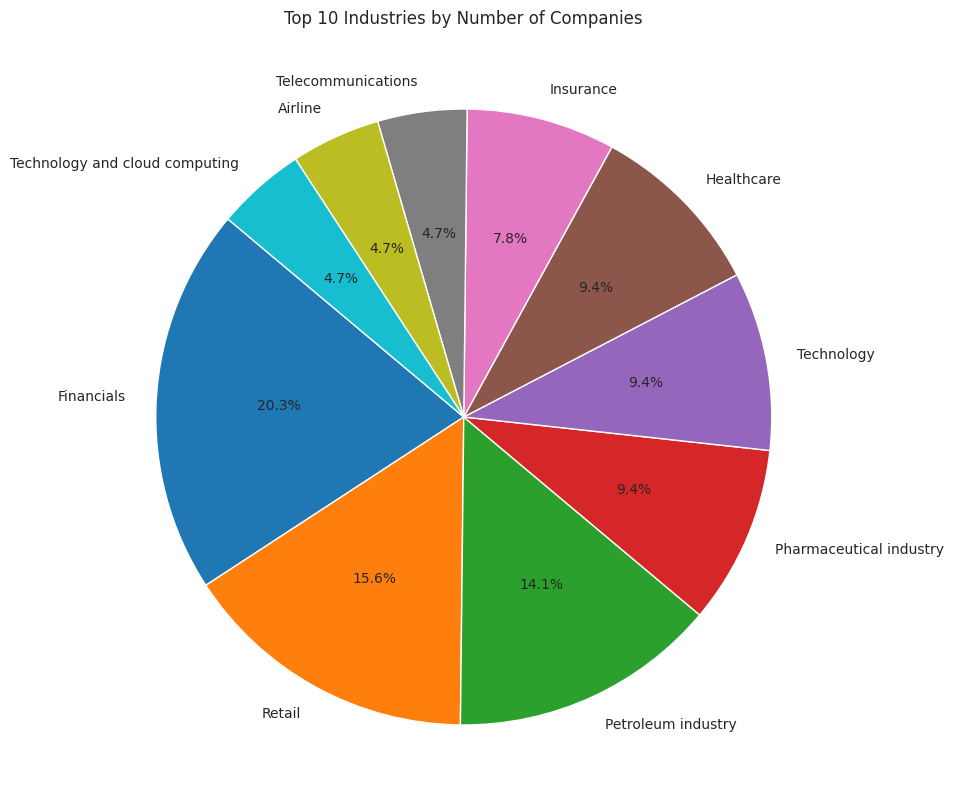

In [301]:
# Count the number of companies in each industry
industry_counts = df['Industry'].value_counts()

# Select the top 20 industries
top_10_industries = industry_counts.head(10)

# Plot
plt.figure(figsize=(10, 10))
plt.pie(top_10_industries, labels=top_10_industries.index, autopct='%1.1f%%', startangle=140)

# Title
plt.title('Top 10 Industries by Number of Companies')

plt.show()

### Revenue Growth Analysis (Scatter Plot)

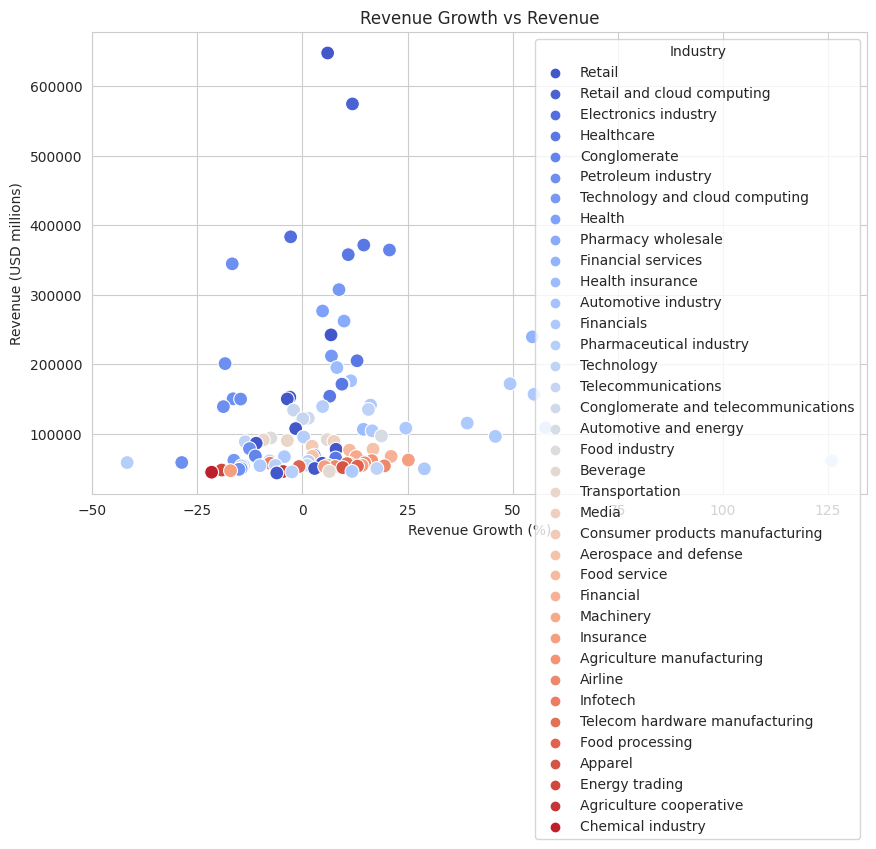

In [302]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Revenue growth'], y=df['Revenue (USD millions)'], hue=df['Industry'], s=100, palette='coolwarm')
plt.xlabel('Revenue Growth (%)')
plt.ylabel('Revenue (USD millions)')
plt.title('Revenue Growth vs Revenue')
plt.show()

### Number of Employees by Company (Top 20 Employers)

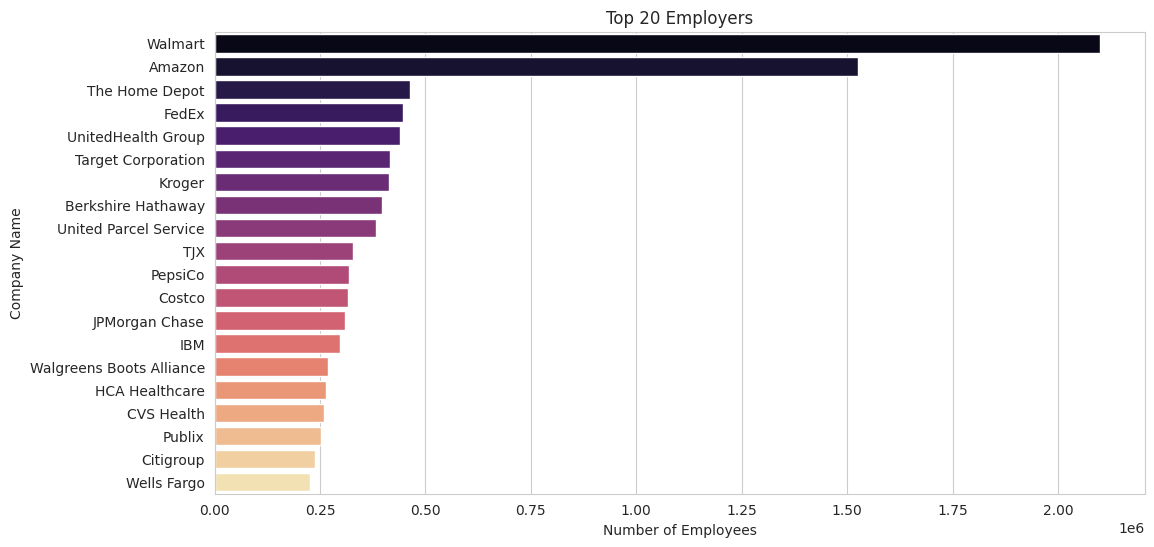

In [304]:
# Convert 'Employees' to numeric (removing commas if necessary)
df['Employees'] = df['Employees'].astype(str).str.replace(',', '').astype(float)

# Sort the top 20 companies by number of employees
top_20_employers = df.nlargest(20, 'Employees')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_employers['Employees'], y=top_20_employers['Name'], palette='magma')

# Labels and title
plt.xlabel('Number of Employees')
plt.ylabel('Company Name')
plt.title('Top 20 Employers')

plt.show()